In [61]:
import pandas as pd
df=pd.read_csv('/Users/chloe/PycharmProjects/bnb/bnb_repo/data/raw/listings2.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,29059,https://www.airbnb.com/rooms/29059,20250306035235,2025-03-07,city scrape,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,CENTRAL is the watchword: everything is close....,https://a0.muscache.com/pictures/736399/fa6c31...,125031,...,4.78,4.82,4.68,"267153, expires: 2025-04-01T00:00:00Z",f,2,2,0,0,2.67
1,29061,https://www.airbnb.com/rooms/29061,20250306035235,2025-03-07,city scrape,Maison historique - Quartier Latin,Lovely historic house with plenty of period ch...,The neighborhood you'll discover is called the...,https://a0.muscache.com/pictures/9e59d417-4b6a...,125031,...,4.82,4.87,4.71,"267153, expires: 2025-04-01T00:00:00Z",f,2,2,0,0,0.96
2,36301,https://www.airbnb.com/rooms/36301,20250306035235,2025-03-12,previous scrape,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",The neighborhood is very lively while the stre...,https://a0.muscache.com/pictures/26c20544-475f...,381468,...,4.90,4.88,4.77,NaN,f,6,6,0,0,0.44
3,38118,https://www.airbnb.com/rooms/38118,20250306035235,2025-03-11,city scrape,Beautiful room with a balcony in front of a parc,Nearest metro Papineau. Situated in front of P...,NaN,https://a0.muscache.com/pictures/213997/763ec1...,163569,...,4.82,4.65,4.41,NaN,f,2,0,2,0,0.10
4,50479,https://www.airbnb.com/rooms/50479,20250306035235,2025-03-07,city scrape,L'Arcade Douce,The appartement is sunny and ideally situated ...,Our area is full of life (but our street is qu...,https://a0.muscache.com/pictures/airflow/Hosti...,231694,...,4.98,4.84,4.93,"271530, expires: 2025-05-01T00:00:00Z",t,2,1,1,0,1.84


In [62]:
df.shape

(9772, 79)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9772 entries, 0 to 9771
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9772 non-null   int64  
 1   listing_url                                   9772 non-null   object 
 2   scrape_id                                     9772 non-null   int64  
 3   last_scraped                                  9772 non-null   object 
 4   source                                        9772 non-null   object 
 5   name                                          9772 non-null   object 
 6   description                                   9616 non-null   object 
 7   neighborhood_overview                         4421 non-null   object 
 8   picture_url                                   9772 non-null   object 
 9   host_id                                       9772 non-null   i

In [64]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [65]:


# Select relevant features
selected_columns = [
    'latitude', 'longitude', 'neighbourhood_cleansed',
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'property_type', 'host_is_superhost', 'host_since', 'host_listings_count',
    'availability_365', 'minimum_nights', 'maximum_nights',
    'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness',
    'review_scores_location', 'instant_bookable', 'has_availability',
    'reviews_per_month', 'price'  # target
]

df = df[selected_columns].copy()


In [66]:
df.head()

,latitude,longitude,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,property_type,host_is_superhost,...,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,instant_bookable,has_availability,reviews_per_month,price
0,45.51939,-73.56482,Ville-Marie,Entire home/apt,4,1.0,1.0,3.0,Entire rental unit,t,...,2,60,478,4.68,4.63,4.82,f,t,2.67,$161.00
1,45.51929,-73.56493,Ville-Marie,Entire home/apt,4,1.0,2.0,2.0,Entire home,t,...,2,21,153,4.74,4.68,4.87,f,t,0.96,$271.00
2,45.53026,-73.58413,Le Plateau-Mont-Royal,Entire home/apt,2,NaN,1.0,NaN,Entire rental unit,t,...,210,730,52,4.87,4.87,4.88,f,t,0.44,NaN
3,45.52699,-73.55840,Ville-Marie,Private room,1,1.0,3.0,4.0,Private room in rental unit,f,...,31,60,17,4.53,4.24,4.65,f,t,0.10,$47.00
4,45.54157,-73.60737,Rosemont-La Petite-Patrie,Entire home/apt,3,1.0,2.0,2.0,Entire rental unit,t,...,3,28,323,4.96,4.94,4.84,t,t,1.84,$112.00


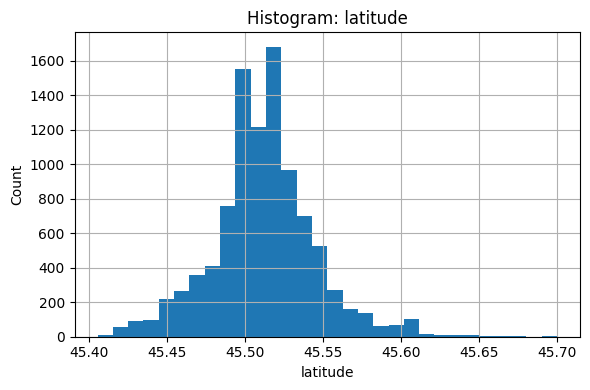

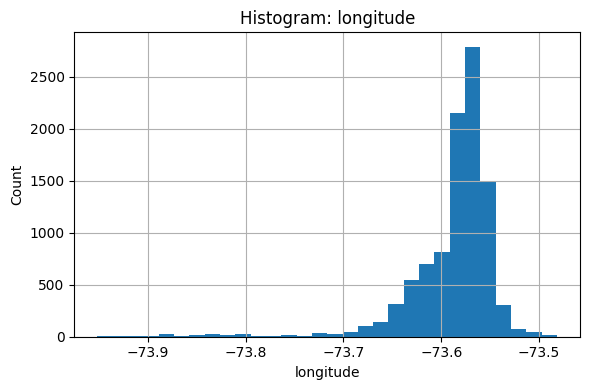

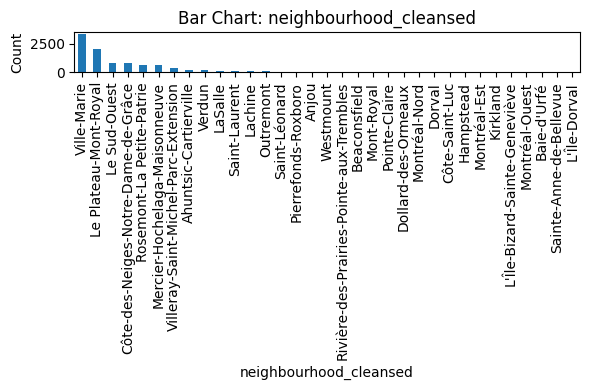

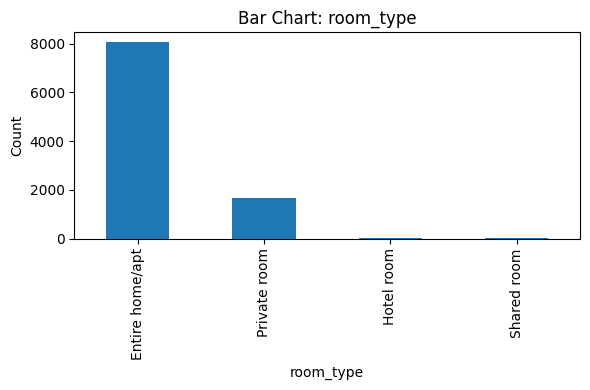

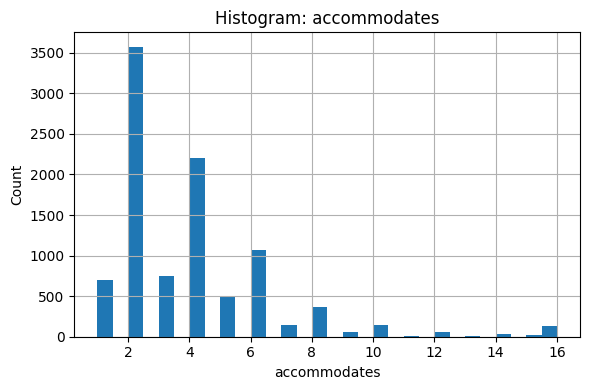

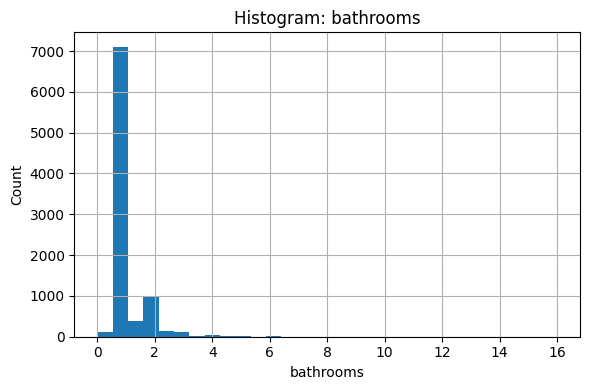

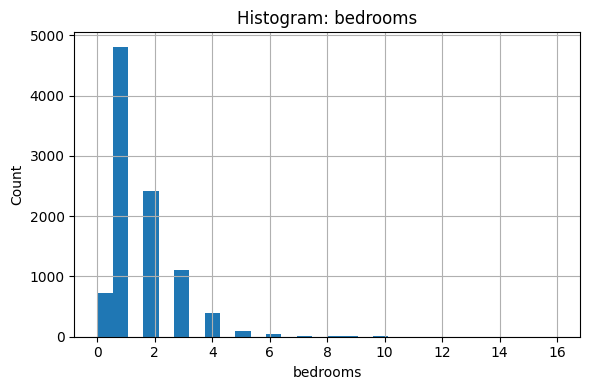

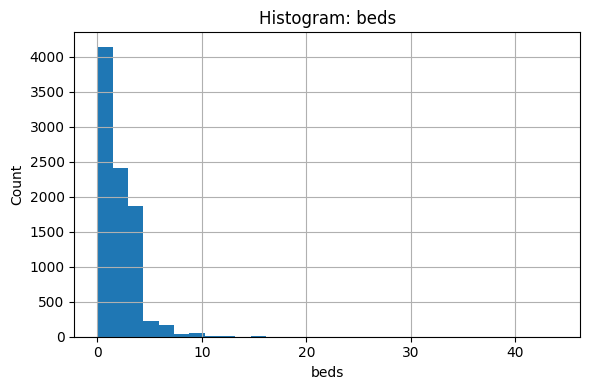

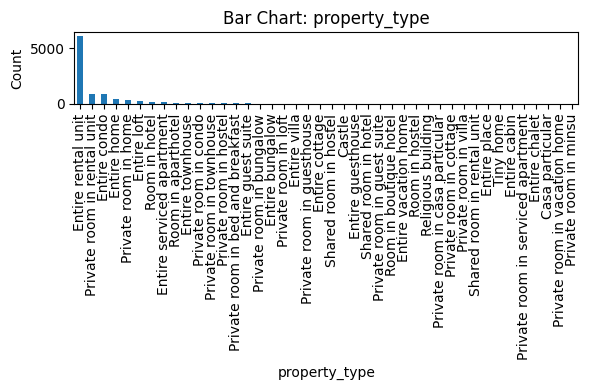

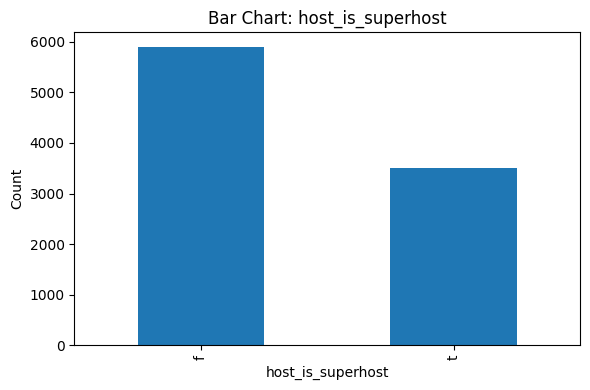

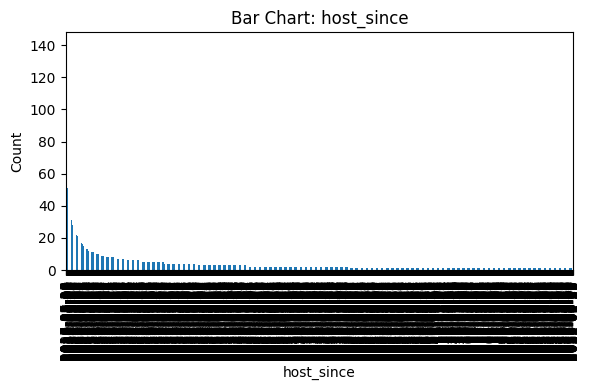

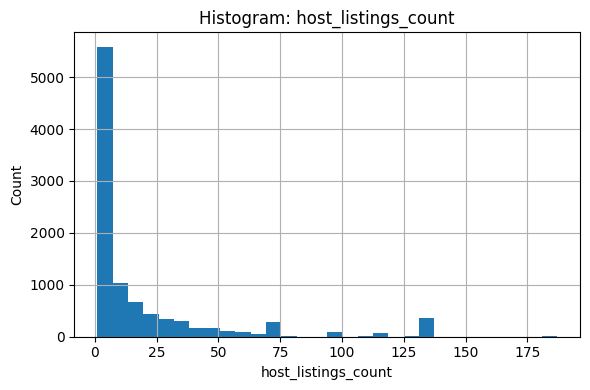

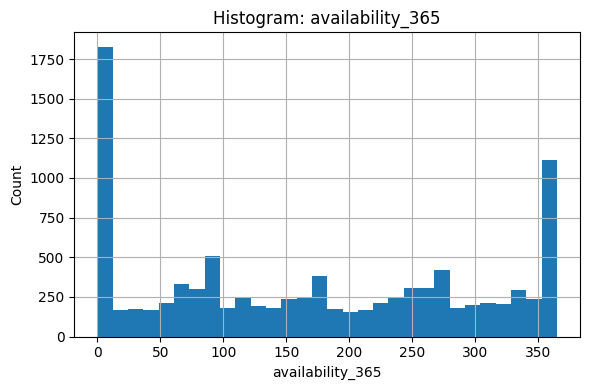

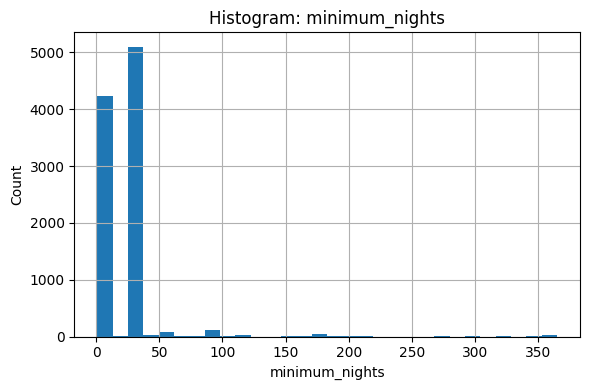

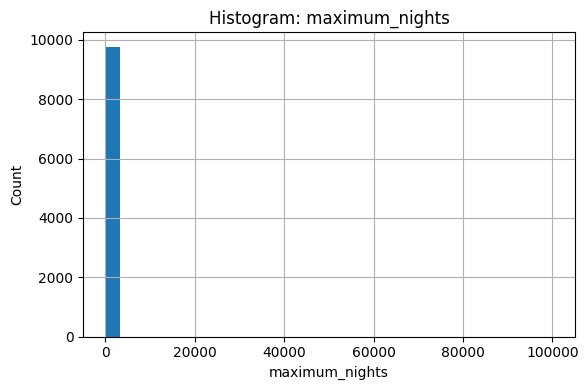

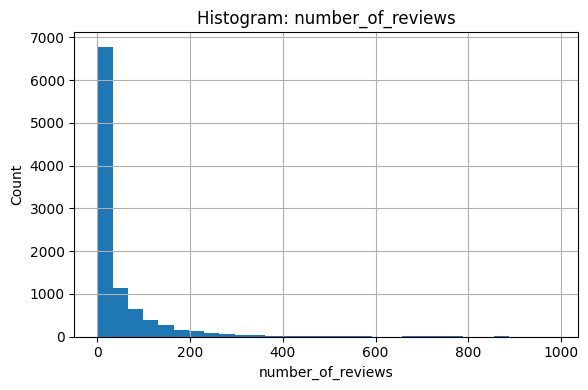

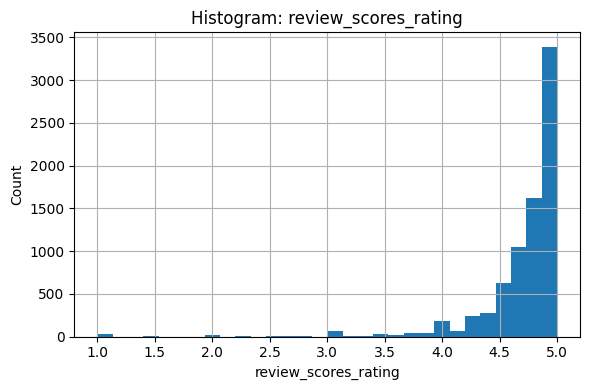

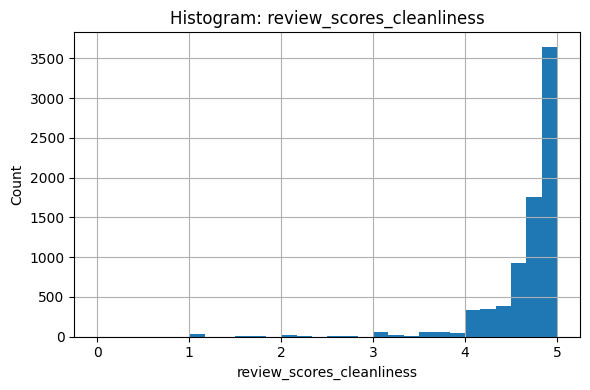

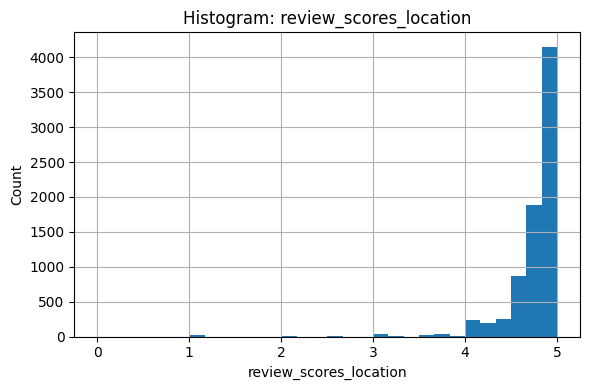

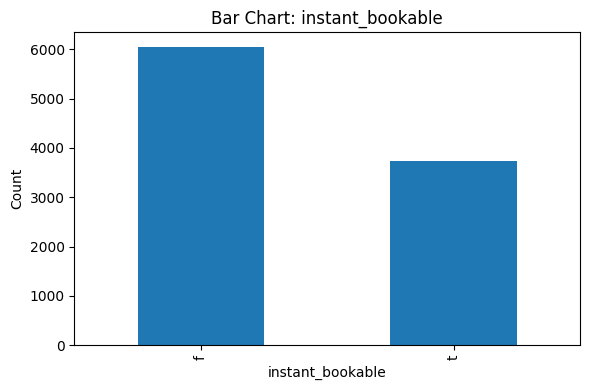

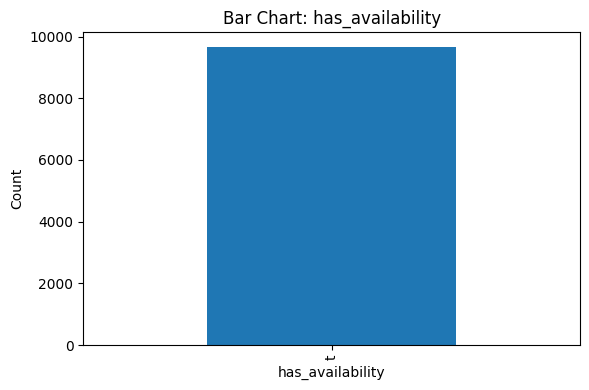

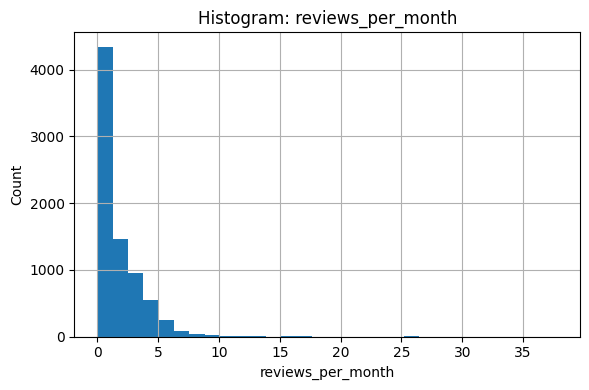

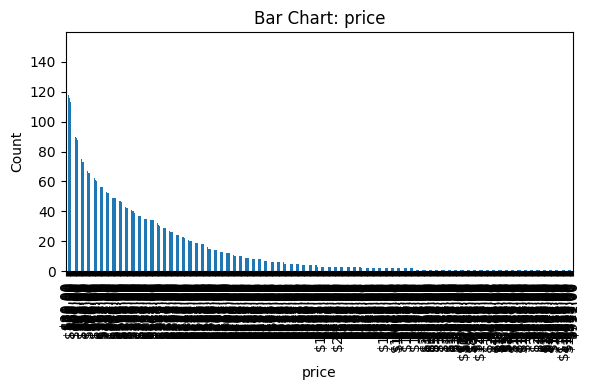

In [67]:
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(6, 4))
    if df[col].dtype == 'object':
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Bar Chart: {col}')
    else:
        df[col].hist(bins=30)
        plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [68]:
# Get categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Loop through and print value counts
for col in categorical_cols:
    print(f"\n📊 Column: {col}")
    print(df[col].value_counts(dropna=False))



📊 Column: neighbourhood_cleansed
neighbourhood_cleansed
Ville-Marie                                 3320
Le Plateau-Mont-Royal                       2000
Le Sud-Ouest                                 810
Côte-des-Neiges-Notre-Dame-de-Grâce          772
Rosemont-La Petite-Patrie                    640
Mercier-Hochelaga-Maisonneuve                591
Villeray-Saint-Michel-Parc-Extension         391
Ahuntsic-Cartierville                        231
Verdun                                       203
LaSalle                                      122
Saint-Laurent                                110
Lachine                                       82
Outremont                                     67
Saint-Léonard                                 56
Pierrefonds-Roxboro                           46
Anjou                                         40
Westmount                                     37
Rivière-des-Prairies-Pointe-aux-Trembles      33
Beaconsfield                                  28
Mont-Royal  

In [69]:
# drop column' has_availability' since it is almost only have one value
df.drop(columns=['has_availability'], inplace=True)

In [70]:

df = df[~df['room_type'].isin(['Hotel room', 'Shared room'])]


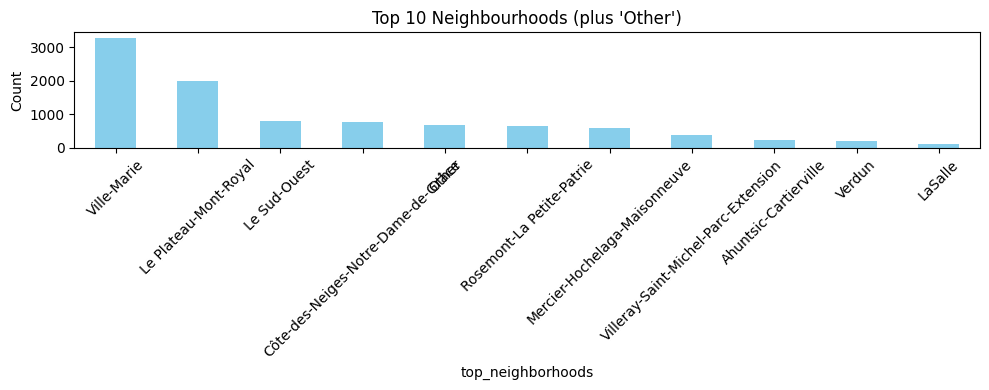

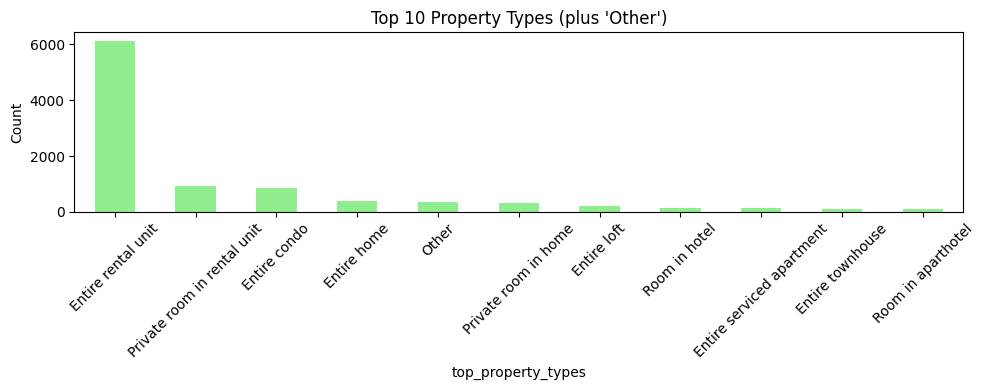

In [71]:
# keep only first 10 categories for column 'neighbourhood_cleansed' and 'property_type' as there are too many columns

# Limit 'neighbourhood_cleansed' to top 10
top_neighborhoods = df['neighbourhood_cleansed'].value_counts().nlargest(10).index
df['top_neighborhoods'] = df['neighbourhood_cleansed'].apply(
    lambda x: x if x in top_neighborhoods else 'Other'
)

# Limit 'property_type' to top 10
top_property_types = df['property_type'].value_counts().nlargest(10).index
df['top_property_types'] = df['property_type'].apply(
    lambda x: x if x in top_property_types else 'Other'
)

# Plot top neighborhoods
df['top_neighborhoods'].value_counts().plot(kind='bar', figsize=(10, 4), color='skyblue')
plt.title("Top 10 Neighbourhoods (plus 'Other')")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot top property types
df['top_property_types'].value_counts().plot(kind='bar', figsize=(10, 4), color='lightgreen')
plt.title("Top 10 Property Types (plus 'Other')")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [75]:
# Get categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Loop through and print value counts
for col in categorical_cols:
    print(f"\n📊 Column: {col}")
    print(df[col].value_counts(dropna=False))


📊 Column: neighbourhood_cleansed
neighbourhood_cleansed
Ville-Marie                                 3282
Le Plateau-Mont-Royal                       2000
Le Sud-Ouest                                 810
Côte-des-Neiges-Notre-Dame-de-Grâce          772
Rosemont-La Petite-Patrie                    639
Mercier-Hochelaga-Maisonneuve                591
Villeray-Saint-Michel-Parc-Extension         391
Ahuntsic-Cartierville                        231
Verdun                                       203
LaSalle                                      122
Saint-Laurent                                110
Lachine                                       82
Outremont                                     67
Saint-Léonard                                 56
Pierrefonds-Roxboro                           46
Anjou                                         40
Westmount                                     35
Rivière-des-Prairies-Pointe-aux-Trembles      33
Beaconsfield                                  28
Mont-Royal  

In [73]:
df.head()

,latitude,longitude,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,property_type,host_is_superhost,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,instant_bookable,reviews_per_month,price,top_neighborhoods,top_property_types
0,45.51939,-73.56482,Ville-Marie,Entire home/apt,4,1.0,1.0,3.0,Entire rental unit,t,...,60,478,4.68,4.63,4.82,f,2.67,$161.00,Ville-Marie,Entire rental unit
1,45.51929,-73.56493,Ville-Marie,Entire home/apt,4,1.0,2.0,2.0,Entire home,t,...,21,153,4.74,4.68,4.87,f,0.96,$271.00,Ville-Marie,Entire home
2,45.53026,-73.58413,Le Plateau-Mont-Royal,Entire home/apt,2,NaN,1.0,NaN,Entire rental unit,t,...,730,52,4.87,4.87,4.88,f,0.44,NaN,Le Plateau-Mont-Royal,Entire rental unit
3,45.52699,-73.55840,Ville-Marie,Private room,1,1.0,3.0,4.0,Private room in rental unit,f,...,60,17,4.53,4.24,4.65,f,0.10,$47.00,Ville-Marie,Private room in rental unit
4,45.54157,-73.60737,Rosemont-La Petite-Patrie,Entire home/apt,3,1.0,2.0,2.0,Entire rental unit,t,...,28,323,4.96,4.94,4.84,t,1.84,$112.00,Rosemont-La Petite-Patrie,Entire rental unit


In [76]:
dF =pd.read_csv("/Users/chloe/PycharmProjects/bnb/bnb_repo/data/processed/airbnb_montreal_cleaned.csv")
dF. head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,host_is_superhost,host_listings_count,availability_365,minimum_nights,...,neighbourhood_cleansed_LaSalle,neighbourhood_cleansed_Le Plateau-Mont-Royal,neighbourhood_cleansed_Le Sud-Ouest,neighbourhood_cleansed_Mercier-Hochelaga-Maisonneuve,neighbourhood_cleansed_Other,neighbourhood_cleansed_Rosemont-La Petite-Patrie,neighbourhood_cleansed_Verdun,neighbourhood_cleansed_Ville-Marie,neighbourhood_cleansed_Villeray-Saint-Michel-Parc-Extension,price_per_person
0,45.51939,-73.56482,4,1.0,1.0,3.0,1,2.0,350,2,...,False,False,False,False,False,False,False,True,False,40.250000
1,45.51929,-73.56493,4,1.0,2.0,2.0,1,2.0,327,2,...,False,False,False,False,False,False,False,True,False,67.750000
2,45.53026,-73.58413,2,1.0,1.0,2.0,1,8.0,190,210,...,False,True,False,False,False,False,False,False,False,50.000000
3,45.52699,-73.55840,1,1.0,3.0,4.0,0,3.0,313,31,...,False,False,False,False,False,False,False,True,False,47.000000
4,45.54157,-73.60737,3,1.0,2.0,2.0,1,2.0,34,3,...,False,False,False,False,False,True,False,False,False,37.333333
